In [29]:
import numpy as np
import pandas as pd

In [30]:
df = pd.read_csv('Churn_Modelling.csv')

In [31]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [32]:
df.drop(columns = ['RowNumber', 'CustomerId', 'Surname'], inplace = True)

In [33]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [34]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [35]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [36]:
df = pd.get_dummies(df, columns = ['Geography', 'Gender'], drop_first = True)

In [37]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [38]:
X = df.drop(columns = 'Exited')
y = df['Exited']

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)

In [41]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [42]:
model = Sequential()

model.add(Dense(11, activation='sigmoid', input_dim = 11))
model.add(Dense(11, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [43]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [44]:
model.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [45]:
history = model.fit(X_train, y_train, batch_size=50, epochs=100, verbose=1, validation_split=0.2)

Epoch 1/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3750 - loss: 0.7540 - val_accuracy: 0.7969 - val_loss: 0.5368
Epoch 2/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 494us/step - accuracy: 0.7865 - loss: 0.5300 - val_accuracy: 0.7969 - val_loss: 0.5008
Epoch 3/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step - accuracy: 0.7915 - loss: 0.5089 - val_accuracy: 0.7969 - val_loss: 0.4984
Epoch 4/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step - accuracy: 0.7993 - loss: 0.4970 - val_accuracy: 0.7969 - val_loss: 0.4982
Epoch 5/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step - accuracy: 0.7940 - loss: 0.5055 - val_accuracy: 0.7969 - val_loss: 0.4981
Epoch 6/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step - accuracy: 0.8001 - loss: 0.4944 - val_accuracy: 0.7969 - val_loss: 0.4979
Epoch 7/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step - accuracy: 0.7959 - loss: 0.5027 - val_accuracy: 0.7969 - val_loss: 0.4976
Epoch 8/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step - accuracy: 0.7923 - loss: 0.5

In [46]:
y_pred = model.predict(X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 482us/step


In [47]:
y_pred

array([[0.23476616],
       [0.23476616],
       [0.22678013],
       ...,
       [0.22678013],
       [0.24938998],
       [0.23476616]], dtype=float32)

In [48]:
y_pred = y_pred.argmax(axis = -1)

In [49]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7975

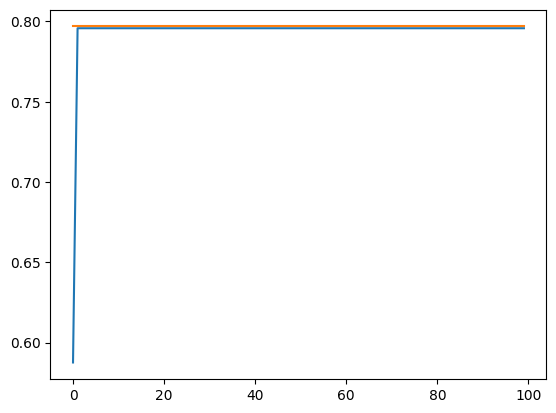

In [50]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

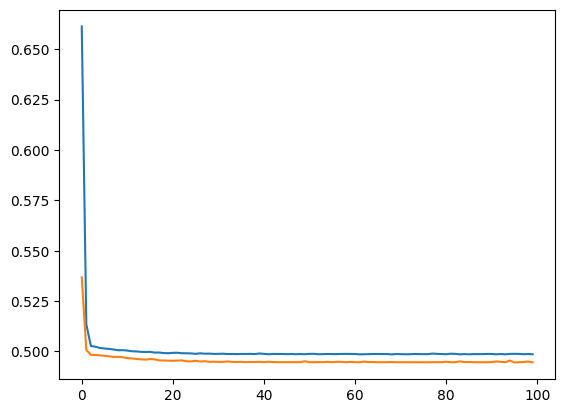

In [51]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])